**Course** = BIL 470 / HOMEWORK 2<br/>
**Name** = MERT CAN GÖNEN<br/>
**ID** = 181101039<br/>
**HOMEWORK 3**

In [15]:
import pandas as pd
import random
import numpy as np
from sklearn import metrics
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sb
import plotly_express as px

from sklearn.model_selection import train_test_split
from kmeans import KMeansClusterClassifier

# <span style="color:red">Dataset Loading</span>

In [16]:
data = pd.read_csv("Iris.csv", index_col="Id")
data["Species"] = data["Species"].replace(["Iris-setosa","Iris-versicolor","Iris-virginica",],[0,1,2])

# <span style="color:red">Create Train and Test List</span>

In [17]:
X = data.values.tolist();
y = [];
for row in X:
    y.append(int(row[4]));
    del row[4];

X = pd.Series(X);
y = pd.Series(y);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True);

X_train = X_train.values.tolist();
y_train = y_train.values.tolist();
X_test = X_test.values.tolist();
y_test = y_test.values.tolist();

# <span style="color:red">Elbow Curve</span>

Text(0.5, 1.0, 'Elbow curve')

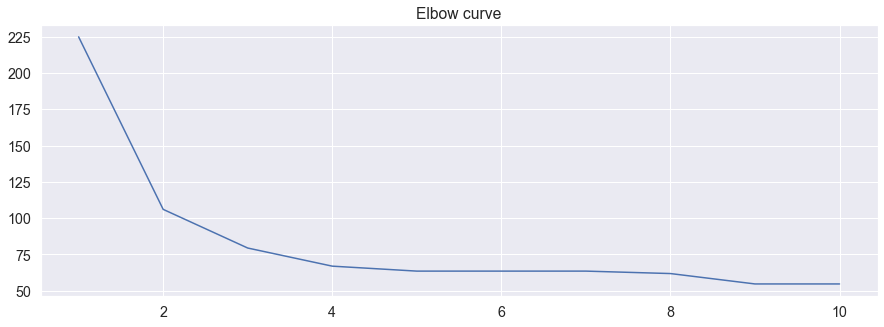

In [18]:
elbowResults = []

for i in range(1,11):
    kmcc = KMeansClusterClassifier(n_cluster = i)
    kmcc.fit(X_train)
    inertia = kmcc.inertia
    elbowResults.append(inertia)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(1,11), elbowResults)
plt.grid(True)
plt.title('Elbow curve')

**!** As we can see on the elbow curve, 3 is the optimal centroid number.

# <span style="color:red">Training</span>

In [19]:
kmcc = KMeansClusterClassifier(n_cluster = 3)
kmcc.fit(X_train)
predictions = kmcc.predict(X_test)
predictions_train = kmcc.predict(X_train)

predictions = [(pred+1)%3 for pred in predictions]
predictions_train = [(pred+1)%3 for pred in predictions_train]

# <span style="color:red">Cluster Plot for Dataset</span>

In [20]:
px.scatter_3d(data[120:150], x="PetalLengthCm", y="PetalWidthCm", z="SepalLengthCm", size="SepalWidthCm", color=predictions, color_discrete_map = {"Joly": "blue", "Bergeron": "violet", "Coderre":"pink"})

# <span style="color:red">Confusion Matrix for Train and Test</span>

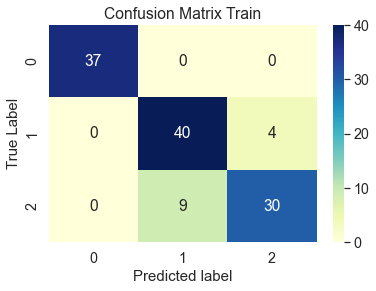

<Figure size 720x504 with 0 Axes>

In [21]:
confusion_matrix_train = metrics.confusion_matrix(y_train, predictions_train)

matrix_df = pd.DataFrame(confusion_matrix_train)

ax = plt.axes()
sb.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sb.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="YlGnBu")
ax.set_title('Confusion Matrix Train')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

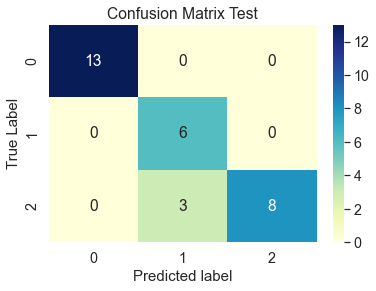

<Figure size 720x504 with 0 Axes>

In [22]:
confusion_matrix_test = metrics.confusion_matrix(y_test, predictions)

matrix_df = pd.DataFrame(confusion_matrix_test)

ax = plt.axes()
sb.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sb.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="YlGnBu")
ax.set_title('Confusion Matrix Test')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)

plt.show()

# <span style="color:red">Evaluation Metrics for Train and Test</span>

### F1 Score 

In [23]:
average = 'weighted'

testF1 = metrics.f1_score(y_test, predictions, average = average)
trainF1 = metrics.f1_score(y_train, predictions_train, average = average)

print("F1 Score of Test Data:")
print(testF1,"\n")     

print("F1 Score of Train Data:")
print(trainF1)

F1 Score of Test Data:
0.9021052631578947 

F1 Score of Train Data:
0.8908688073844945


### Accuracy

In [24]:
average = 'weighted'

trainAccuracy = metrics.accuracy_score(y_train,predictions_train) 
testAccuracy = metrics.accuracy_score(y_test,predictions)

print("Accuracy of Test Data:")
print(testAccuracy,"\n")

print("Accuracy of Train Data:")
print(trainAccuracy)

Accuracy of Test Data:
0.9 

Accuracy of Train Data:
0.8916666666666667


### Precision

In [25]:
average = 'weighted'

trainPrecision = metrics.precision_score(y_train, predictions_train, average = average)
testPrecision = metrics.precision_score(y_test, predictions, average = average)

print("Precision of Test Data:")
print(testPrecision,"\n")

print("Precision of Train Data:")
print(trainPrecision)

Precision of Test Data:
0.9333333333333333 

Precision of Train Data:
0.8944177671068428


### Recall

In [26]:
average = 'weighted'

trainRecall = metrics.recall_score(y_train, predictions_train, average = average)
testRecall = metrics.recall_score(y_test, predictions, average = average)

print("Recall for Test Data:")
print(testRecall,"\n")

print("Recall for Train Data:")
print(trainRecall)

Recall for Test Data:
0.9 

Recall for Train Data:
0.8916666666666667


# <span style="color:red">ROC Curve for Train and Test Data</span>

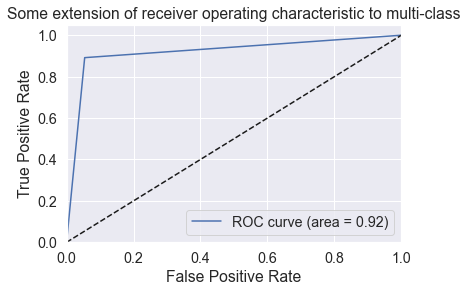

In [27]:
y_result = []
y_original = []
for i in range(3):
    y_original.append([int(x==i) for x in y_train])
    y_result.append([int(x==i) for x in predictions_train])
y_original = np.array(y_original)
y_result = np.array(y_result)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_original[:, i], y_result[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr[average], tpr[average], _ = metrics.roc_curve(y_result.ravel(), y_original.ravel())
roc_auc[average] = metrics.auc(fpr[average], tpr[average])
plt.figure()
plt.plot(fpr[average], tpr[average],
         label='ROC curve (area = {0:0.2f})'
               ''.format(roc_auc[average]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

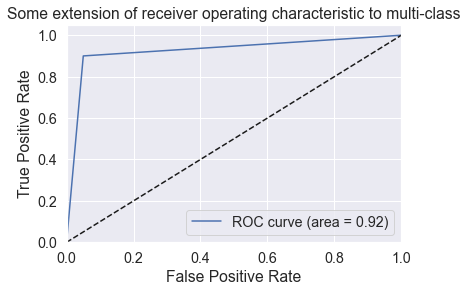

In [28]:
y_result = []
y_original = []
for i in range(3):
    y_original.append([int(x==i) for x in y_test])
    y_result.append([int(x==i) for x in predictions])
y_original = np.array(y_original)
y_result = np.array(y_result)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_original[:, i], y_result[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr[average], tpr[average], _ = metrics.roc_curve(y_result.ravel(), y_original.ravel())
roc_auc[average] = metrics.auc(fpr[average], tpr[average])
plt.figure()
plt.plot(fpr[average], tpr[average],
         label='ROC curve (area = {0:0.2f})'
               ''.format(roc_auc[average]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# <span style="color:red">Conclusion</span>

If we compare the results of the evaluation metrics of decision tree model that we performed in the first assignment in this term with the results of this model:
1) F1 score is lower than Decision Tree<br/>
2) Accuracy is lower than Decision Tree<br/>
3) Precission is lower than Decision Tree<br/>
4) Recall is lower than Decision Tree<br/>
<br/>
If we compare the results of confusion matrix of decision tree model that we performed in the first assignment in this term with the results of this model:
1) The amount of true positives in the test data is higher in the Decision Tree.<br/>
2) The amount of true positives in the train data is higher in the Decision Tree.<br/>
<br/>
As a conclusion, clustering for labeled data pretending that there is no label is more unsuccessful than training labeled data using these labels. But, as we can see on the results of evaluation metrics and confusion matrix of K-means clustering model, there is no big difference between these 2 models results.